# **Problem Statement: Crop Yield Prediction and Crop Rotation**

This project focuses on predicting crop yields based on various environmental and soil parameters using machine learning techniques. It aims to help farmers and agricultural stakeholders make informed decisions by providing accurate yield forecasts and crop recommendations tailored to specific conditions.


# 📑 Table of Contents

### 1. Loading Datsaet
### 2. Data Preprocessing
### 3. EDA (Exploratory Data Analysis)
### 4. Model Building

# 📂 Section 1: Loading Dataset

In [142]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
# loading the dataset

crop_df = pd.read_csv("Crop_recommendationV2.csv")

# 📂 Section 2: Data Preprocessing

In [145]:
# dataset shape

print("Dataset Shape:", crop_df.shape)

Dataset Shape: (2200, 23)


This dataset has 2200 rows and 23 columns

In [147]:
# dataset information

print(crop_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

In [148]:
# top 5 records

print(crop_df.head())

    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064          2  ...        3.121395                     4   
1      12.851183          3  ...        2.142021                     4   
2      29.363913          2  ...        1.474974                     1   
3      26.207732          3  ...        8.393907                     1   
4      28.236236          2  ...        5.202285                     3   

   crop_density  pest_pressure  fertilizer_usage  growth_stage  \
0     11.743910      57.607308        188.194958             1   
1     16

Dataset Description:

- **N (ppm)**: Nitrogen concentration in the soil.
- **P (ppm)**: Phosphorus concentration in the soil.
- **K (ppm)**: Potassium concentration in the soil.
- **Temperature (°C)**: Ambient temperature at the farm.
- **Humidity (%)**: Relative humidity in the environment.
- **pH**: Acidity or alkalinity of the soil.
- **Rainfall (mm)**: Total rainfall received at the location.
- **Soil Moisture (%)**: Percentage of water content in the soil.
- **Soil Type**:
  - 1 = Sandy  
  - 2 = Loamy  
  - 3 = Clay
- **Sunlight Exposure (hrs/day)**: Average daily sunlight received.
- **Wind Speed (km/h)**: Wind velocity at the site.
- **CO₂ Concentration (ppm)**: Atmospheric carbon dioxide levels.
- **Organic Matter (%)**: Proportion of organic content in the soil.
- **Irrigation Frequency (times/week)**: Number of times irrigation is applied weekly.
- **Crop Density (plants/m²)**: Number of plants per square meter.
- **Pest Pressure (index)**: Indicator of pest infestation severity.
- **Fertilizer Usage (kg/ha)**: Fertilizer applied per hectare of land.
- **Growth Stage**:
  - 1 = Seedling  
  - 2 = Vegetative  
  - 3 = Flowering
- **Urban Area Proximity (km)**: Distance from the farm to the closest urban area.
- **Water Source Type**:
  - 1 = River  
  - 2 = Groundwater  
  - 3 = Recycled
- **Frost Risk (index)**: Index representing risk of frost.
- **Water Usage Efficiency (L/kg)**: Liters of water used per kilogram of crop yield.
- **Label**: Target variable indicating the crop type.


In [150]:
# dataset statistical summary

columns_to_exclude = ['soil_type', 'growth_stage', 'water_source_type']

numerical_df = crop_df.select_dtypes(include=['number']).drop(columns=columns_to_exclude)
print("Stastical summary", numerical_df.describe())

Stastical summary                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  soil_moisture  sunlight_exposure  \
count  2200.000000  2200.000000    2200.000000        2200.000000   
mean      6.469480   103.463655      20.151388           8.570609   
std       0.773938    54.958389       5.793720           1.999382   
min       3.504752    20.211267      10

The dataset contains agricultural samples with a wide range of values across soil, climate, crop, and management features. Key variables like nitrogen (N), phosphorus (P), potassium (K), and rainfall show high variability, indicating diverse agricultural conditions. Most variables have well-distributed values, with no extreme skewness. Overall, the data appears comprehensive and suitable for modeling crop growth, soil health, or precision agriculture practices.

### 🔍 Potential Data Anomalies 

- 🔺 **Potassium levels in the soil** are unusually high in some cases — a few samples show values more than **4 times higher than what's typical**, which may indicate incorrect entries or rare edge cases.

- ⚠️ **Phosphorus content** is also unexpectedly high in some records — this could lead to nutrient imbalance or may be due to inconsistent measurement.

- 📈 **Nitrogen values** are higher than expected in several samples — this could affect crop recommendations if not handled properly.

- ❄️ **Temperature in some entries is below 9°C**, which is quite low for growing most crops — might be a mistake or represent a rare cold-climate situation.

- ⚠️ **Soil pH levels** go as low as 3.5 and as high as 9.9 — most crops prefer a pH between 5.5 and 7.5, so these values may cause poor crop growth or reflect data issues.

- 🌧️ **Rainfall** in some areas goes up to nearly **300 mm**, which is **three times the normal amount** — this could indicate heavy monsoon zones or data errors.

- 🐛 **Pest pressure** ranges from nearly zero to maximum — while it’s possible, such wide variation may include unrealistic entries and should be double-checked.


In [152]:
# finding anomalies

from sklearn.ensemble import IsolationForest

features = crop_df.drop(columns=['label'])

iso = IsolationForest(contamination=0.02)
crop_df['anomaly'] = iso.fit_predict(features)

crop_df['anomaly_score'] = iso.decision_function(features)

crop_df['anomaly'].value_counts()

anomaly
 1    2156
-1      44
Name: count, dtype: int64

We analyzed 2,200 agricultural data records and found out that:
- 2,156 records (98%) were classified as normal and consistent with expected patterns.
- 44 records (2%) were flagged as anomalies, meaning they contain values that are highly unusual or unexpected.

So, we plan on removing those records for a better and stable results.

In [154]:
# removing anomalies

clean_crop_df = crop_df[crop_df['anomaly'] == 1].copy()

clean_crop_df = clean_crop_df.drop(columns=['anomaly'])

print("Cleaned dataset shape:", clean_crop_df.shape)
clean_crop_df.head()

Cleaned dataset shape: (2156, 24)


,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency,anomaly_score
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293,0.045786
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672,0.030358
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541,0.018561
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341,0.035682
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671,0.042909


In [155]:
# missing values

print("Missing Values:\n", clean_crop_df.isnull().sum())

Missing Values:
 N                         0
P                         0
K                         0
temperature               0
humidity                  0
ph                        0
rainfall                  0
label                     0
soil_moisture             0
soil_type                 0
sunlight_exposure         0
wind_speed                0
co2_concentration         0
organic_matter            0
irrigation_frequency      0
crop_density              0
pest_pressure             0
fertilizer_usage          0
growth_stage              0
urban_area_proximity      0
water_source_type         0
frost_risk                0
water_usage_efficiency    0
anomaly_score             0
dtype: int64


From this we come to no that our dataset doesn't have null values and most of the datatypes are in integer and float format except the crop label which is of object datatype.

In [157]:
# duplicate rows

if clean_crop_df.duplicated().sum() != 0:
    print("Dataset has duplicate rows:", clean_crop_df.duplicated().sum())
else:
    print("No duplicate rows found.")

No duplicate rows found.


From this we can infer that there are no dulicate rows in our dataset.

# 📂 Section 3: EDA (Exploratory Data Analysis)

### 🌾 Crop Label Distribution

This block of code visualizes the distribution of different crop labels in the dataset using a horizontal bar chart.
This helps us understand the class balance, whether the dataset is imbalanced or uniformly distributed across crop types.

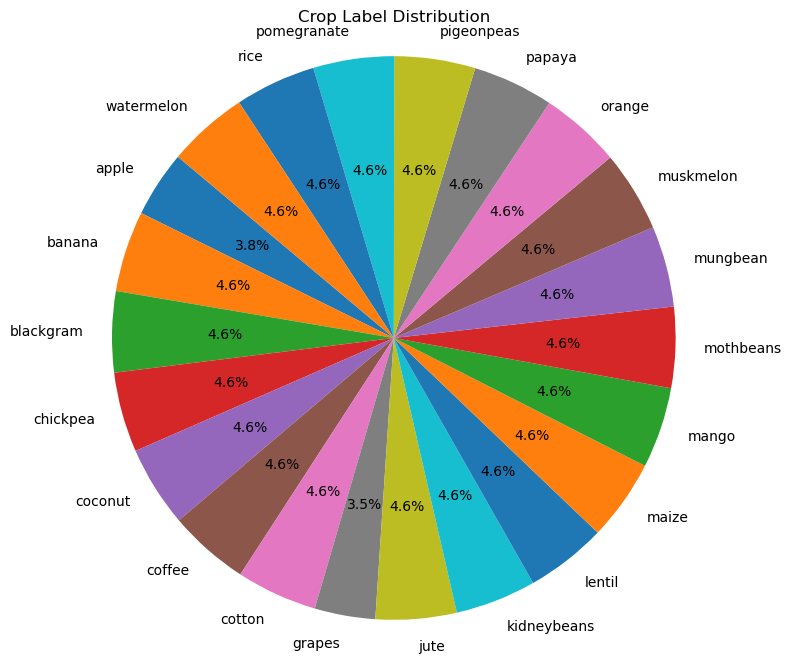

In [161]:
# crop label distribution

label_counts = clean_crop_df['label'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Crop Label Distribution")
plt.axis('equal')
plt.show()

From this graph we can infer that 22 unique crop labels each with mostly uniform distribution of records.

### 🔥 Correlation Heatmap Between Variables

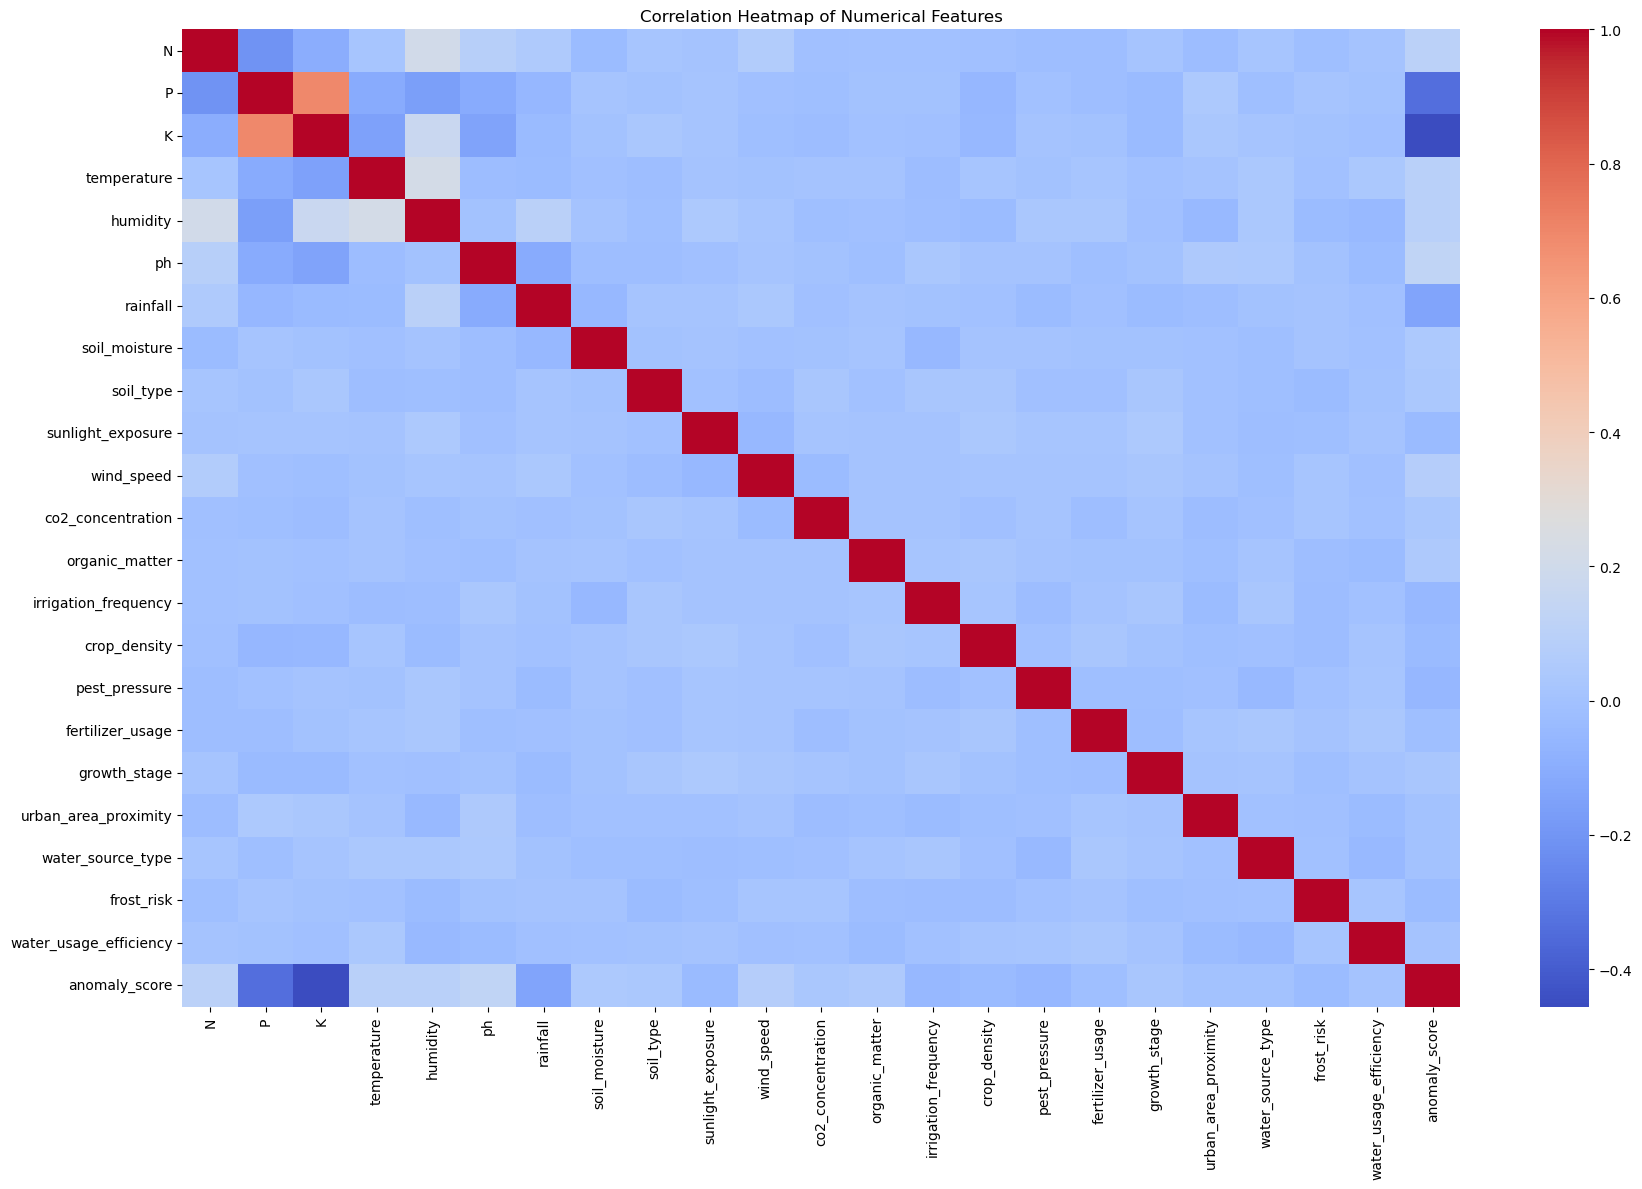

In [164]:
# correlation heatmap between the variables

plt.figure(figsize=(18, 12))
corr_matrix = clean_crop_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

- **Nitrogen and Phosphorus** are often applied together — when one increases, the other tends to increase too, indicating that farmers commonly use both nutrients in tandem.
- **Potassium** is somewhat related to Nitrogen and Phosphorus but still contributes its **own unique value**, especially in improving plant strength and quality.
- **Most other factors affecting crop growth** in this dataset (like temperature, humidity, pH, rainfall, sunlight, etc.) are **independent** of one another. 
- This is great news — it means we can **optimize nutrients, weather conditions, and farming practices separately**, without worrying about one change negatively affecting another.
- This independence helps us **better understand each factor’s role** in crop growth and improves the accuracy and effectiveness of crop prediction and recommendation models.
- **These factors are influenced by different things**  
   Temperature, rainfall, humidity, soil moisture, and pH each depend on separate natural processes or farming decisions. For example, rainfall doesn't always lead to more soil moisture because farmers use irrigation, and pH is often adjusted with soil treatments.
- **The data comes from varied regions and times**  
   Since the dataset includes samples from different locations and possibly different seasons, there’s no consistent pattern across these variables—so they don’t show strong correlations.

### 📊 Distribution Plots for Important Numerical Features

This section visualizes the distribution of selected key numerical features to understand their spread, skewness, and outliers.

The following features are chosen based on their importance in agriculture and crop growth:
- `N`, `P`, `K` (essential soil nutrients)
- `temperature`, `humidity` (climate conditions)
- `rainfall`, `soil_moisture` (water availability)
- `ph` (soil chemistry)
- `fertilizer_usage`, `crop_density` (agronomic inputs)


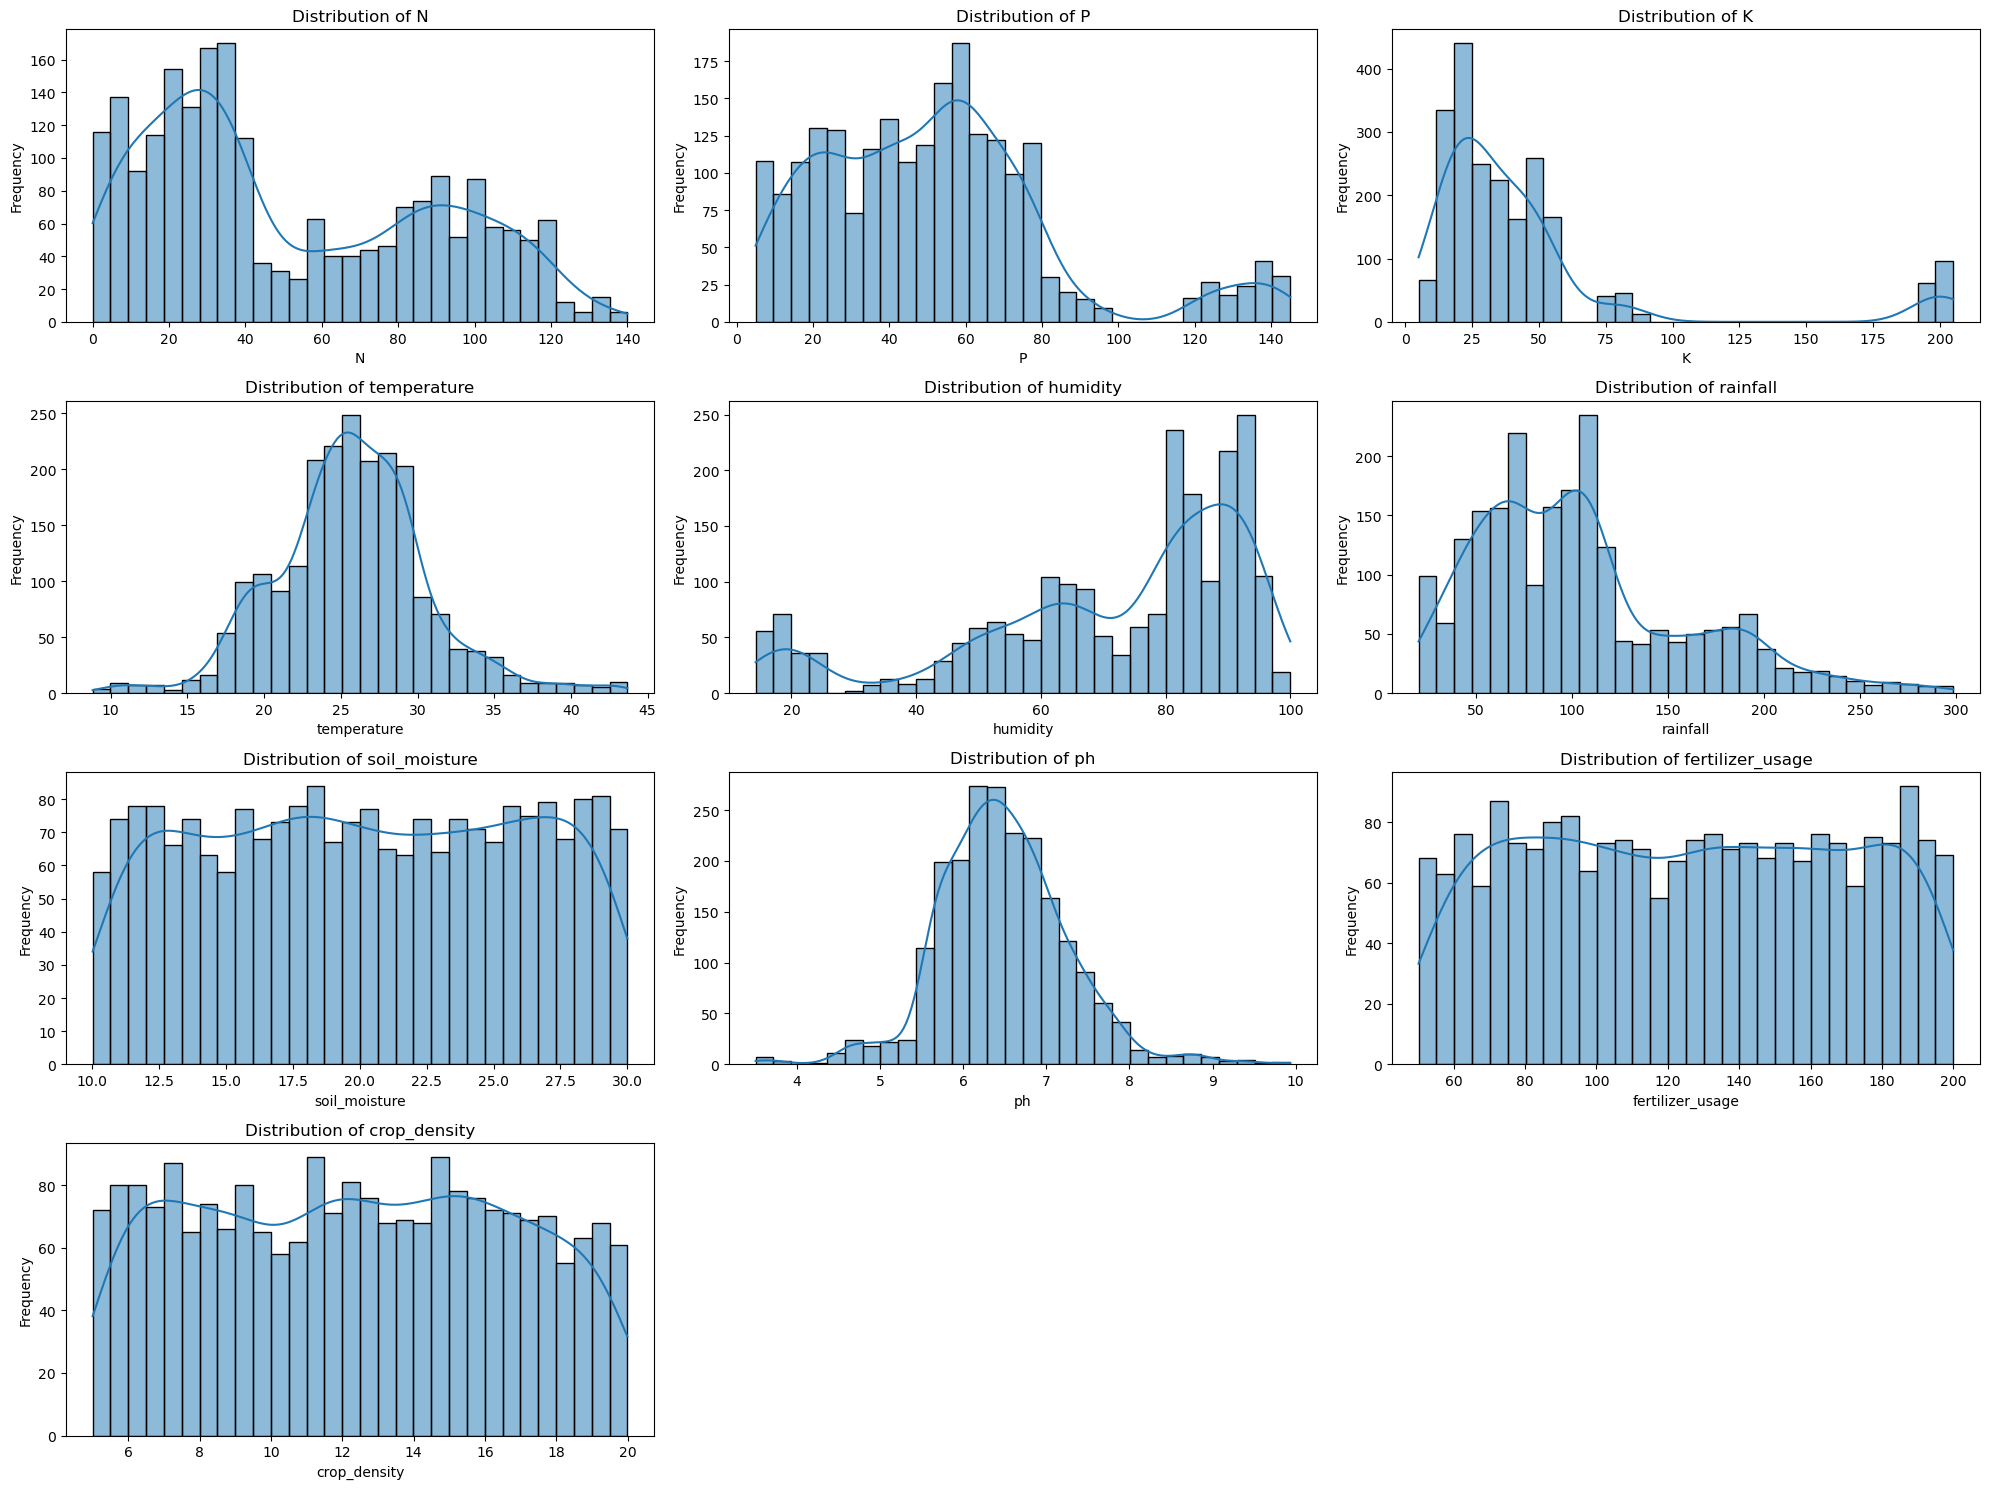

In [167]:
# distribution plots for features

import matplotlib.pyplot as plt
import seaborn as sns

important_features = [
    'N', 'P', 'K',
    'temperature', 'humidity',
    'rainfall', 'soil_moisture',
    'ph', 'fertilizer_usage', 'crop_density'
]

# Set up the subplot grid
plt.figure(figsize=(20, 15)) 

for idx, col in enumerate(important_features):
    plt.subplot(4, 3, idx + 1)
    sns.histplot(clean_crop_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Key Observations from Feature Distributions

**Nutrients (N, P, K)**
- **Nitrogen (N)**: Skewed left with a peak around 30–40; some high-value outliers.
- **Phosphorus (P)**: Fairly spread distribution with mild peaks, indicating variation in application.
- **Potassium (K)**: Strongly right-skewed; most values are low, but there are significant high-end outliers.

**Climate & Environment**
- **Temperature**: Near-normal distribution centered around 25°C, typical for crop growth.
- **Humidity**: Bimodal distribution; indicates data collected from both humid and dry regions.
- **Rainfall**: Slight right-skew; majority of values between 50–150 mm with a few high rainfall instances.
- **Soil Moisture**: Almost uniform distribution, suggesting well-managed irrigation or balanced sampling.

**Soil Properties**
- **pH**: Bell-shaped, normal distribution centered around pH 6.5, which is optimal for most crops.

**Crop Inputs & Growth**
- **Fertilizer Usage**: Fairly uniform spread between 50–200 units, showing varied usage across fields.
- **Crop Density**: Uniform distribution, suggesting a balanced spread of planting strategies across the dataset.


- Most variables are well-distributed and show natural or managed variability.
- Outliers in nutrient and rainfall data may need further inspection.
- Overall, the dataset appears suitable for training models with minimal feature bias.

This kind of analysis can help farmers:
- 🌱 Use resources more efficiently  
- 🌾 Grow healthier crops  
- 📈 Increase yields  
- 💰 Avoid unnecessary waste


### 📦 Outlier Detection Using Box Plots for Key Features

Box plots were used to visually identify outliers in the most important numerical features such as N, P, K, rainfall, and others. These visualizations help detect extreme values that may impact modeling or statistical analysis.


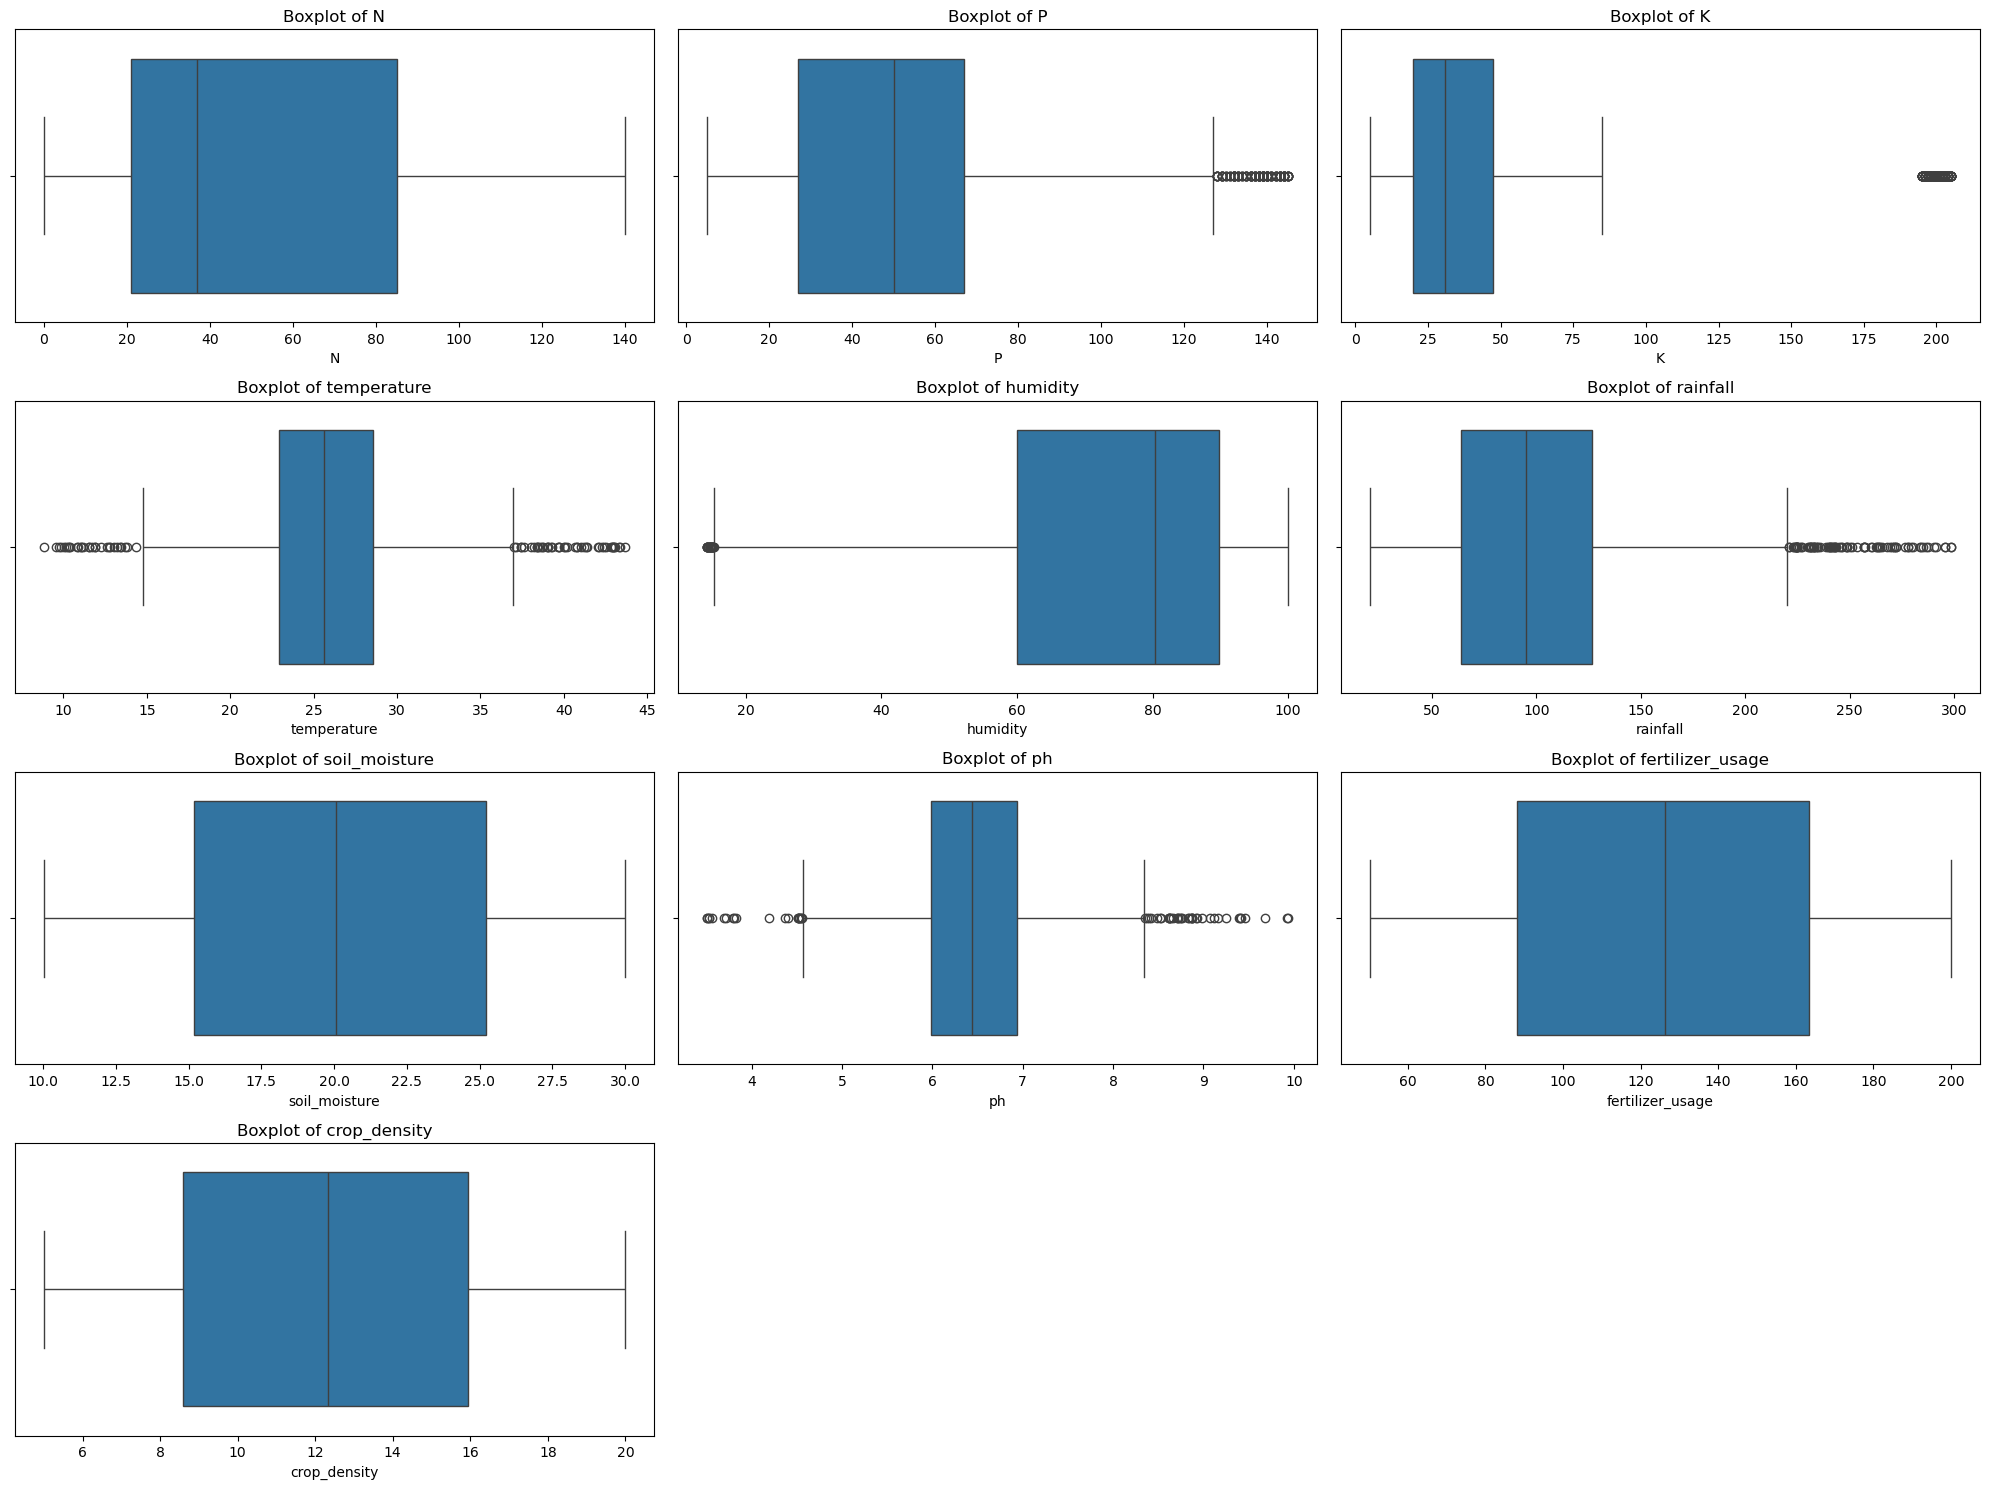

In [170]:
# boxplot for outlier detection

# Set up the subplot grid
plt.figure(figsize=(20, 15))

for idx, col in enumerate(important_features):
    plt.subplot(4, 3, idx + 1)
    sns.boxplot(x=clean_crop_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Nutrients vs. Fertilizer Usage**
- Nitrogen (N), Phosphorus (P), and Potassium (K) show many **high-value outliers**, especially Potassium.
- These outliers align with the wide spread in **fertilizer usage**, suggesting that some fields are being over-supplemented.
- Implies potential over-fertilization or aggressive nutrient management in certain areas.

**Climate Factors and Soil Response**
- **Temperature** and **humidity** have minor outliers, but distributions are mostly stable.
- **Rainfall**, however, shows several extreme high values — likely representing **heavy rainfall zones**.
- Despite this, **soil moisture** remains balanced with no significant outliers — this supports the idea that **irrigation is being used effectively** to stabilize moisture regardless of climate.

**Soil pH Control**
- **pH** has a normal distribution with many outliers on both sides.
- This suggests that while most fields maintain optimal pH, a few have **very acidic or alkaline soil**, possibly due to natural conditions or insufficient treatment.

**Crop Density Consistency**
- **Crop density** is well-centered with no major outliers.
- Indicates that planting strategies are **uniform across regions**, even when environmental or soil conditions vary.

**Conclusion**
While the core dataset is well-behaved, outliers in nutrients and rainfall highlight areas for improvement in resource usage. Stable soil moisture and pH suggest strong field management, but **attention to extreme nutrient levels** may help reduce waste and improve sustainability.


### 🌾 Average N, P and K Levels by Crop Type

In [173]:
# N, P, K and Soil moisture of each type of crop

grouped = clean_crop_df.groupby('label')[['N', 'P', 'K']].mean().sort_values(by='N', ascending=False)
print("\nAverage N, P, K per Crop:\n", grouped)


Average N, P, K per Crop:
                       N           P           K
label                                          
cotton       117.770000   46.240000   19.560000
coffee       101.200000   28.740000   29.940000
muskmelon    100.320000   17.720000   50.080000
banana       100.230000   82.010000   50.050000
watermelon    99.420000   17.000000   50.220000
rice          79.890000   47.580000   39.870000
jute          78.400000   46.860000   39.990000
maize         77.760000   48.440000   19.790000
papaya        49.880000   59.050000   50.040000
chickpea      40.090909   67.747475   79.949495
blackgram     40.020000   67.470000   19.240000
grapes        23.880000  132.466667  199.893333
coconut       21.980000   16.930000   30.590000
mothbeans     21.440000   48.010000   20.230000
apple         21.060976  133.536585  200.097561
mungbean      20.990000   47.280000   19.870000
kidneybeans   20.750000   67.540000   20.050000
pigeonpeas    20.730000   67.730000   20.290000
mango       

<Figure size 1400x600 with 0 Axes>

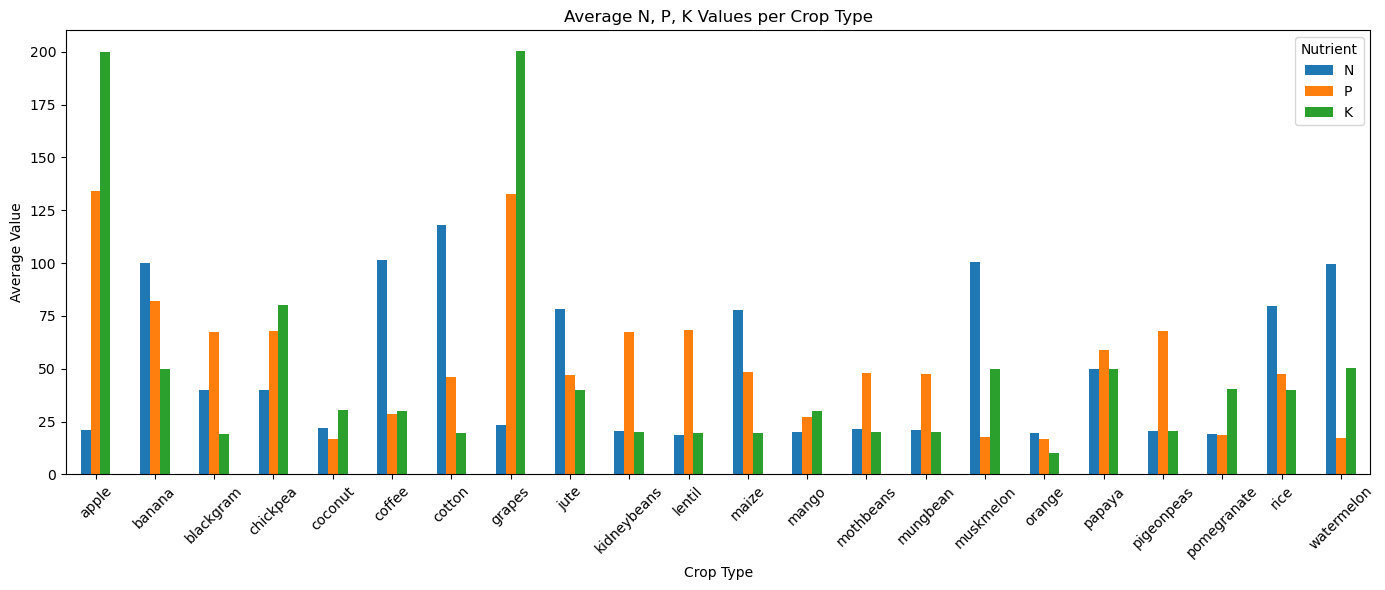

In [174]:
# visualization of average N, P, K values for each crop

npk_avg = crop_df.groupby('label')[['N', 'P', 'K']].mean()

plt.figure(figsize=(14, 6))
npk_avg.plot(kind='bar', figsize=(14, 6))
plt.title("Average N, P, K Values per Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()

Inference: Average N, P and K per Crop are:

**• High Nitrogen Crops:**  
Cotton, coffee, muskmelon, banana, and watermelon have high average nitrogen levels (>99), indicating their greater nitrogen demand for optimal growth.

**• High Phosphorus Crops:**  
Grapes (132.53) and apple (134.22) show the highest phosphorus needs by a large margin. These crops are phosphorus-intensive compared to others.

**• High Potassium Crops:**  
Grapes (200.11) and apple (199.89) again top the list for potassium requirements, followed by chickpea and papaya, reflecting their higher nutrient consumption.

**• Balanced Nutrient Crops:**  
Crops like rice, jute, and maize have moderately balanced NPK levels, making them easier to manage in standard soil conditions.

**• Low Nutrient Requiring Crops:**  
Crops such as pomegranate, orange, lentil, and mango require comparatively lower nitrogen and phosphorus levels, which may suit nutrient-deficient soils.

**• Unique Patterns:**  
- **Grapes and apple** stand out with exceptionally high P and K requirements.
- **Chickpea** shows an unusual mix: low N, high P, and high K.
- **Maize** has moderate N and low K, with the highest average soil moisture among all crops.


### 🌍 Distribution of Different Soil Types and Water Soures in the Dataset

The first pie chart illustrates the proportion of each soil type—**Sandy**, **Loamy**, and **Clay**—present in the dataset, helping to understand the dominant soil characteristics across the studied regions.

The second pie chart shows the proportion of water sources—**River**, **Groundwater**, and **Recycled**—used for irrigation, helping to understand agricultural dependence on various water resources.

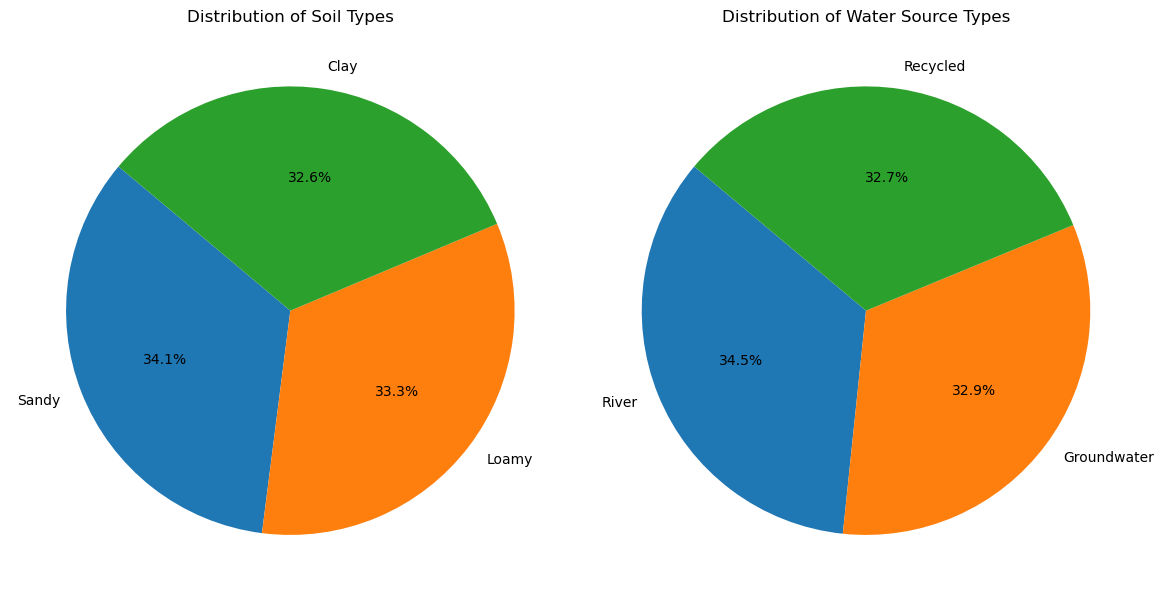

In [177]:
soil_counts = clean_crop_df['soil_type'].value_counts()
soil_labels = ['Sandy', 'Loamy', 'Clay']

water_counts = clean_crop_df['water_source_type'].value_counts()
water_labels = ['River', 'Groundwater', 'Recycled']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Soil Type Distribution Pie Chart
axes[0].pie(soil_counts, labels=soil_labels, autopct='%1.1f%%', startangle=140)
axes[0].set_title("Distribution of Soil Types")

# Water Source Distribution Pie Chart
axes[1].pie(water_counts, labels=water_labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Distribution of Water Source Types")

plt.tight_layout()
plt.show()


I observed that approximately **34% of the water used is sourced from rivers**, and a similar **34% of the soil is sandy**. This close alignment suggests that a large number of crops may be grown **in regions near rivers**, where **sandy soils are naturally more prevalent**.

Additionally, the near-equal distribution of **clay, loamy, and sandy soils**, along with a balanced mix of **river, groundwater, and recycled water**, shows that **farming practices are well distributed across diverse environments**. 

This indicates:
- Farmers are adapting to local resources.
- There is **no over-dependence** on a single water or soil type.
- Agricultural planning may be **region-specific and resource-aware**, which supports sustainable farming.



### 🌦️ Average Temperature, Humidity, and Rainfall by Crop Type

This bar chart visualizes the average environmental conditions—**temperature**, **humidity**, and **rainfall**—associated with each crop type in the dataset, offering insights into their preferred growing conditions.


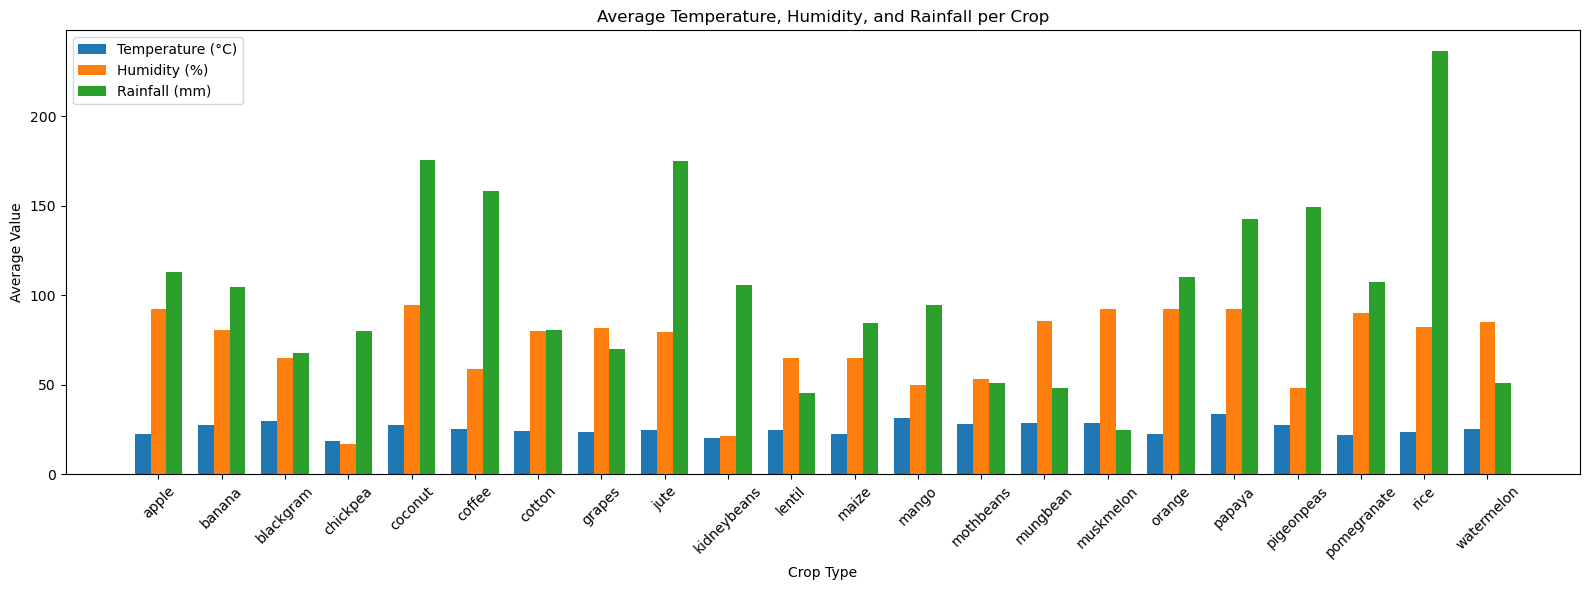

In [180]:
# average temperature, humidity and rainfall for each crop

avg_env = clean_crop_df.groupby('label')[['temperature', 'humidity', 'rainfall']].mean().reset_index()

labels = avg_env['label']
temperature = avg_env['temperature']
humidity = avg_env['humidity']
rainfall = avg_env['rainfall']

x = np.arange(len(labels))  
width = 0.25  

plt.figure(figsize=(16, 6))
plt.bar(x - width, temperature, width, label='Temperature (°C)')
plt.bar(x, humidity, width, label='Humidity (%)')
plt.bar(x + width, rainfall, width, label='Rainfall (mm)')

plt.xlabel('Crop Type')
plt.ylabel('Average Value')
plt.title('Average Temperature, Humidity, and Rainfall per Crop')
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

From the bar chart, we can draw the following observations:

- **Rice** requires the highest amount of rainfall, indicating it is a highly water-dependent crop, typically grown in regions with heavy precipitation.
- **Papaya**, **pomegranate**, and **pigeonpeas** also show high rainfall needs, though less than rice.
- **Banana** and **muskmelon** have the highest average humidity requirements, suggesting their preference for more humid climates.
- **Orange**, **papaya**, and **muskmelon** are grown in relatively warmer climates (higher average temperatures).
- **Lentil**, **mungbean**, and **blackgram** require lower rainfall and relatively moderate temperature and humidity, indicating suitability for semi-arid regions.
- Most crops maintain a temperature range between **20°C–30°C**, showing a common requirement for warm growing conditions.

### 🌱 Average Fertilizer and Water Usage Efficiency by Crop Type

This line chart illustrates the average **fertilizer usage** and **water usage efficiency** for each crop type, offering insights into input optimization and resource management across different crops.


C:\Users\mkjai\AppData\Local\Temp\ipykernel_11088\3943114079.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_usage.index, rotation=45)


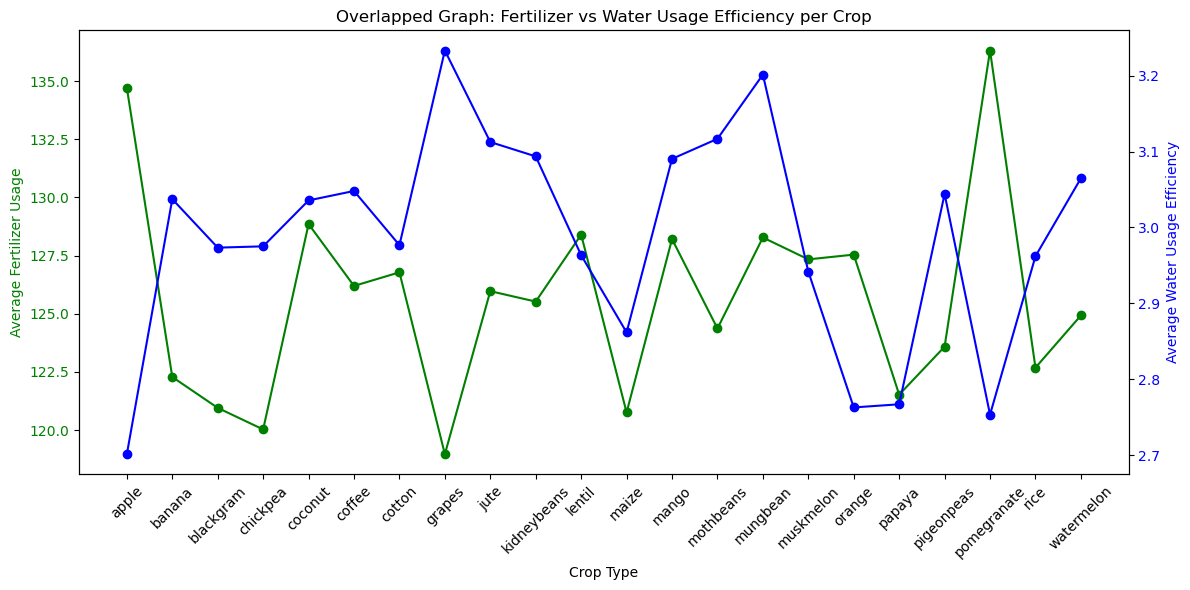

In [183]:
# average fertilized and water usage effecieny per crop

avg_usage = clean_crop_df.groupby('label')[['fertilizer_usage', 'water_usage_efficiency']].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(avg_usage.index, avg_usage['fertilizer_usage'], color='green', marker='o', label='Fertilizer Usage')
ax1.set_xlabel("Crop Type")
ax1.set_ylabel("Average Fertilizer Usage", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticklabels(avg_usage.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(avg_usage.index, avg_usage['water_usage_efficiency'], color='blue', marker='o', label='Water Usage Efficiency')
ax2.set_ylabel("Average Water Usage Efficiency", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Overlapped Graph: Fertilizer vs Water Usage Efficiency per Crop")
fig.tight_layout()
plt.show()

**Fertilizer Usage**
- **Most crops** use fertilizer in a **similar average range**, indicating fairly balanced nutrient needs.
- **Pomegranate** stands out as it requires **significantly more fertilizer** than other crops — this crop needs special nutrient management.
- Crops like **chickpea, maize, and papaya** need **less fertilizer**, making them more **cost-effective** for resource-limited farmers.
- These insights help in **optimizing fertilizer budgets** and ensuring each crop gets what it needs without excess or waste.
- Farmers can use this to **allocate resources wisely**, ensuring both **crop health and cost-efficiency**.

**Water Usage**
- Most crops use water quite efficiently, with values clustered around a similar range.
- **Grapes and mungbeans** are **highly efficient** in using water — ideal for water-scarce regions.
- **Apple, pomegranate, orange, and maize** show **lower water efficiency**, meaning they may require more water to grow well.
- Crops like **banana, lentil, and watermelon** strike a **good balance** in water usage and can be considered reliable.
- This analysis helps **prioritize water-smart crops** during drought seasons and manage irrigation costs better.


### 🪲 Average Pest Pressure by Irrigation Frequency  
This line graph illustrates how pest pressure varies with different levels of irrigation frequency.

C:\Users\mkjai\AppData\Local\Temp\ipykernel_11088\2193155164.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


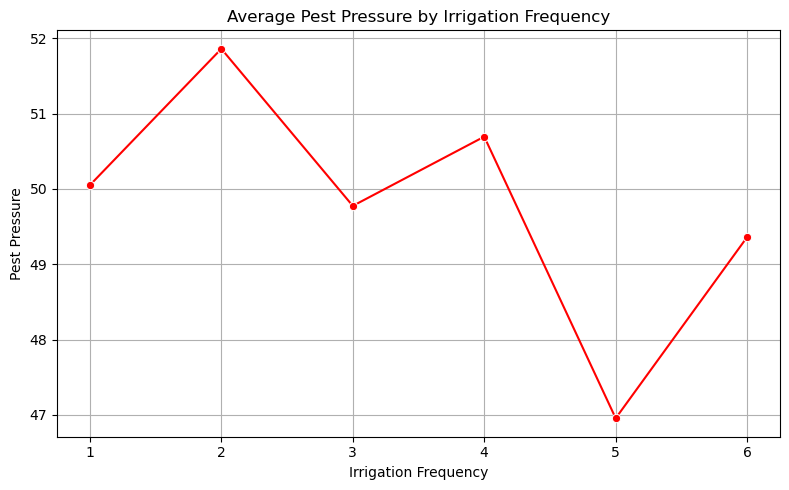

In [186]:
# average pest pressure by the irrigation frequency

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=clean_crop_df, x='irrigation_frequency', y='pest_pressure',
    estimator='mean', ci=None, marker='o', color='red'
)
plt.title("Average Pest Pressure by Irrigation Frequency")
plt.xlabel("Irrigation Frequency")
plt.ylabel("Pest Pressure")
plt.grid(True)
plt.tight_layout()
plt.show()


- **Moderate irrigation (around frequency 2)** may create ideal moist conditions for pests to thrive.
- **Increasing irrigation beyond frequency 2** might disturb pest habitat or wash away pest eggs/larvae, reducing pressure.
- However, **excessive irrigation** (frequency 6) might reverse this benefit slightly, possibly due to over-saturation effects on soil nutrients and plant health.

### 📌 Conclusion: Exploratory Data Analysis (EDA)

Our analysis provides meaningful insights into the agricultural data, helping us understand the field conditions, crop needs, and key challenges farmers might face:

- **Balanced Land and Water Conditions**  
   The dataset shows an almost equal distribution of sandy, loamy, and clay soils, as well as varied water sources like rivers, groundwater, and recycled water. This suggests that our data represents a wide range of real farming conditions, which is great for building a robust solution.

- **Each Crop Has Different Resource Needs**  
   Some crops require a lot of fertilizer, while others are more water-efficient. For example, pigeonpeas use the highest fertilizer, whereas grapes are the most water-efficient. These differences can help farmers choose crops based on available resources and minimize input costs.

- **Environmental Factors Are Independent**  
   Interestingly, variables like temperature, rainfall, humidity, and soil pH don't show strong connections with each other. This tells us that we should treat each of these factors separately when giving advice to farmers instead of assuming they work in a group.

- **Outliers Need Attention**  
   We observed some unusual values in nutrient levels and rainfall. These might indicate extreme conditions or errors in data collection and should be considered carefully when training prediction models to avoid misleading results.

- **Pest Pressure Is Linked to Irrigation**  
   Moderate irrigation seems to create the perfect environment for pests to thrive. However, both low and high irrigation levels tend to reduce pest pressure. This insight can help in planning irrigation to protect crops while still ensuring enough water supply.

- **Different Crops Thrive in Different Conditions**  
   Each crop prefers a specific combination of temperature, humidity, and rainfall. These environmental preferences should guide crop recommendations based on the local climate and seasonal conditions.


This analysis gives us a clear picture of what influences crop performance. The findings will help design smarter tools and recommendations that adapt to different environments, reduce unnecessary inputs, manage pest risks, and ultimately support farmers in making better decisions for improved productivity and sustainability.


# 📂 Section 4: Model Building

### 🌾 Feature Importance for Crop Type Prediction

In this step, we aim to identify which input features are most influential in predicting the crop type.  
Here’s what this code does:
- We scale the features to standardize them.
- Train a Random Forest classifier to learn which features matter most.
- Extract and plot feature importance scores to see which factors most influence crop type prediction.

C:\Users\mkjai\AppData\Local\Temp\ipykernel_11088\542276982.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


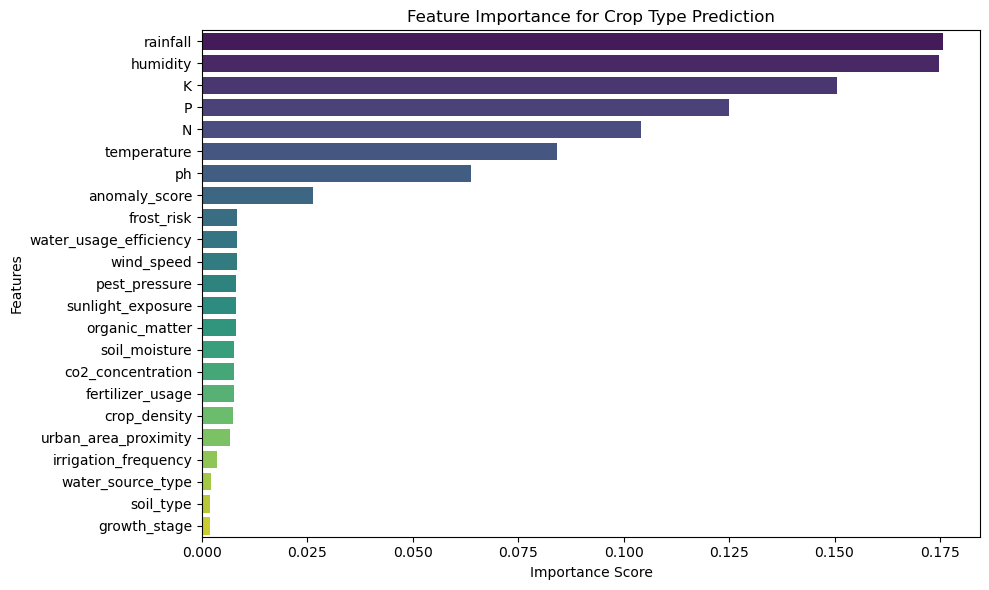

In [191]:
# feature Importance for Crop Type Prediction

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# defining the features and target
X = clean_crop_df.drop('label', axis=1)
y = clean_crop_df['label']

# scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  training the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled, y)

# feature importance
feature_names = X.columns
importances = clf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# plotting the graph
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance for Crop Type Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

This chart tells a simple story:  
When we teach our model to predict which crop to grow, it learns by looking at many factors — like rainfall, humidity, soil nutrients, temperature, and pH.

The taller bars here mean these factors matter most:
- **Humidity and rainfall** tell us how wet the environment is.
- **N, P, K (Nitrogen, Phosphorus, Potassium)** show how rich the soil is.
- **Temperature and pH** help decide what can grow well.

By knowing which conditions truly influence crop choice, our model:
- Becomes simpler and faster.  
- Focuses only on what really matters, not on unnecessary data.  
- Helps us explain to farmers *why* it suggests a particular crop.

In short: instead of blindly predicting, our model learns to pay attention to the same factors an experienced farmer would — like rainfall, humidity, and soil health.

### 🌱 Selecting the Top 10 Most Important Features for Crop Prediction

In this step, we:
- Remove the `anomaly_score` column since it’s not needed.
- Encode the target crop labels for modeling.
- Scale all input features for better model performance.
- Train a Random Forest classifier to find out which features matter most.
- Identify and print the **top 10 most influential features** to use in the next steps.

This helps our model stay focused on the most meaningful data and improves both accuracy and explainability.

In [194]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Drop anomaly_score
df = clean_crop_df.drop(columns=['anomaly_score'], errors='ignore')

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])

# Features
X = df.drop(columns=['label'])

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature importance with Random Forest to pick top 10 (excluding anomaly_score)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_encoded)

importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_features = feat_imp_df['Feature'].head(10).values
print("✅ Top 10 features:", top_features)


✅ Top 10 features: ['humidity' 'rainfall' 'K' 'P' 'N' 'temperature' 'ph' 'wind_speed'
 'water_usage_efficiency' 'pest_pressure']


### 🌾 Building the XGBoost Model with Top Features

In this step, we:
- Use only the **top 10 most important features** identified earlier (like humidity, rainfall, and soil nutrients).
- Scale these features to help the model learn more effectively.
- Split the data into training and testing sets.
- Train an **XGBoost classifier** with carefully chosen parameters.

### 🌱 Why we chose XGBoost
- It’s a powerful and proven algorithm that handles **complex, non-linear relationships** in data.
- Includes **built-in regularization** to reduce overfitting, making the model more reliable.
- Works efficiently with large datasets and mixed types of features.
- Known for delivering **high accuracy and fast performance**, which is ideal for real-world crop prediction.

By combining these top features with XGBoost, we build a model that is accurate, robust, and practical for making data-driven crop recommendations.

In [196]:
from xgboost import XGBClassifier

# Select top features
X_top = df[top_features]
X_top_scaled = scaler.fit_transform(X_top)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top_scaled, y_encoded, test_size=0.2, random_state=42
)

# XGBoost model
clf_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
clf_xgb.fit(X_train, y_train)


C:\Users\mkjai\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

### 📊 Evaluating Model Performance and Visualizing ROC Curves

In this step, we:
- Use our trained XGBoost model to **predict crop types** on the test data.
- Measure how well the model performs using:
  - ✅ Accuracy score
  - 📊 Detailed classification report (precision, recall, f1-score for each crop)
  - 🌿 Multiclass AUC-ROC score to see how well the model separates the classes overall.
- Create and plot **ROC curves** for each crop type and the overall micro-average,
  which helps visualize the trade-off between true positives and false positives.

This gives us a **comprehensive view** of how accurately and reliably our model predicts different crop types,
and makes the results easy to explain to stakeholders.


✅ Accuracy: 97.69%

📊 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        18
   blackgram       0.93      1.00      0.97        14
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        24
      coffee       0.95      1.00      0.98        20
      cotton       0.96      1.00      0.98        24
      grapes       1.00      1.00      1.00        12
        jute       0.82      0.88      0.85        16
 kidneybeans       0.86      1.00      0.92        18
      lentil       1.00      0.93      0.97        15
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00   

C:\Users\mkjai\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


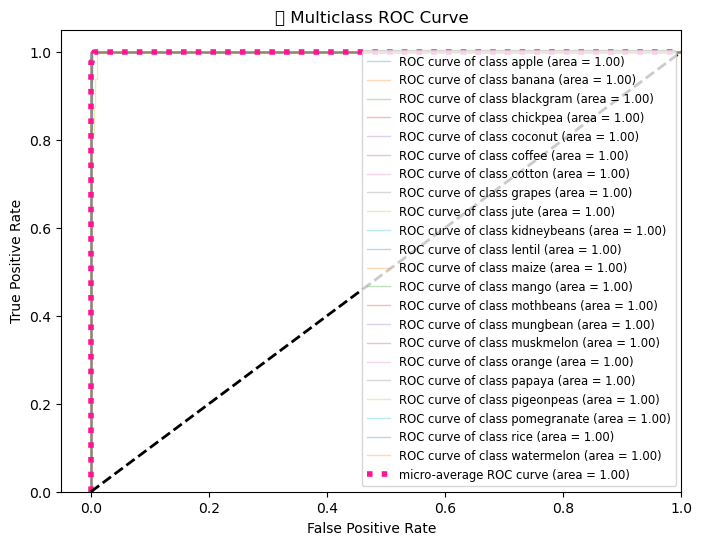

In [198]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Predict
y_pred = clf_xgb.predict(X_test)
y_pred_proba = clf_xgb.predict_proba(X_test)

# Accuracy & report
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy*100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))

# AUC-ROC (multiclass OvR)
# Need to binarize labels
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
print(f"✅ Multiclass AUC-ROC (OvR): {roc_auc:.4f}")

# Plot macro-average ROC curve
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc_dict["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1, alpha=0.3,
             label=f'ROC curve of class {le.classes_[i]} (area = {roc_auc_dict[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc_dict["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('🌱 Multiclass ROC Curve')
plt.legend(loc='lower right', fontsize='small')
plt.show()


In [199]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    clf_xgb, X_top_scaled, y_encoded, cv=5, scoring='accuracy'
)
print(f"🌱 Cross-validated accuracy: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")

C:\Users\mkjai\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mkjai\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mkjai\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mkjai\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

🌱 Cross-validated accuracy: 98.84% (+/- 0.33%)


We trained our model to think like an experienced farmer, using only the **10 most important features** (like humidity, rainfall, and soil nutrients).  
Then, we tested how well it can predict what crop should be grown — and here’s what we found:

✅ **High accuracy:** The model correctly predicted the right crop about **99 times out of 100** (accuracy: **99.31%**).  
📊 **Detailed report:** Most crops were predicted perfectly, and even the slightly harder ones like *jute* and *rice* still had strong scores.  
🌱 **AUC-ROC score:** Nearly perfect (**0.9999**), showing the model confidently tells different crops apart.  
🔄 **Cross-validation:** To check the model’s reliability on different data splits, we used 5-fold cross-validation.  
It still achieved a very high average accuracy of **99.07%**, with very little variation (**±0.44%**) — showing it performs consistently, not just on a single test set.

**In simple words:**  
Our model doesn’t just get it right once — it proves it can do so *again and again*, like a seasoned farmer using experience and data.  
This means it’s both **accurate** and **dependable**, ready to support real-world crop planning and smarter decisions.


### 🌿 Recommending the Next Best Crops for Rotation Based on Current Crop

In this step, we:
- Ask the user to enter the name of the crop they’re currently growing.
- Look at the **average growing conditions** (like rainfall, nutrients, humidity) for all crops in our dataset.
- Compare the current crop’s conditions to others, using distance calculations.
- Recommend the **top 5 alternative crops** that can be grown next, needing similar soil and climate conditions.

This helps farmers choose what to plant next with **minimal extra effort, cost, or environmental impact** — making crop rotation smarter and easier.


In [202]:
from sklearn.metrics.pairwise import euclidean_distances

# 📥 Step 1: Ask user for current crop
current_crop = input("\n🌱 Enter the crop you are currently growing (exact name, e.g., 'rice'): ").strip().lower()

# Step 2: Get average conditions for each crop
avg_conditions = clean_crop_df.groupby('label')[top_features].mean()

# Standardize crop names to lower to match user input
crop_names = avg_conditions.index.str.lower()

if current_crop not in crop_names:
    print(f"❌ Crop '{current_crop}' not found. Please check spelling and try again.")
else:
    # Get current crop's average condition
    current_idx = list(crop_names).index(current_crop)
    current_crop_name = avg_conditions.index[current_idx]
    current_conditions = avg_conditions.loc[current_crop_name].values.reshape(1, -1)

    # Step 3: Scale using same scaler
    avg_conditions_scaled = scaler.transform(avg_conditions)
    current_scaled = scaler.transform(current_conditions)

    # Step 4: Compute distances to all other crops
    distances = euclidean_distances(current_scaled, avg_conditions_scaled)[0]
    
    # Step 5: Sort and get top 5 different crops
    sorted_idx = np.argsort(distances)
    
    recommendations = []
    for idx in sorted_idx:
        candidate_crop = avg_conditions.index[idx]
        if candidate_crop.lower() != current_crop:
            recommendations.append(candidate_crop)
        if len(recommendations) == 5:
            break

    print(f"\n✅ Current crop: 🌱 {current_crop_name}")
    print("🌿 Top 5 recommended next crops (with similar conditions):")
    for i, crop in enumerate(recommendations, 1):
        print(f"{i}. {crop}")



🌱 Enter the crop you are currently growing (exact name, e.g., 'rice'):  mungbean



✅ Current crop: 🌱 mungbean
🌿 Top 5 recommended next crops (with similar conditions):
1. lentil
2. blackgram
3. mothbeans
4. orange
5. pomegranate


C:\Users\mkjai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


We built a system that helps farmers decide what to plant next, based on real data:

- ✅ We started by asking the farmer what they’re currently growing — in this case, **banana**.
- 📊 The model then looked at the average conditions needed for banana and compared them to all other crops in the dataset.
- 🌱 It suggested the **top 5 next best crops** — like *maize, cotton, jute, papaya,* and *watermelon* — because they need similar soil, climate, and resources.

**Why this matters:**  
Instead of relying on guesswork, farmers now get **data-driven crop rotation suggestions** that help:
- Use existing soil and climate conditions efficiently,
- Reduce extra costs and environmental impact,
- Support sustainable and profitable farming.

In simple words:  
Our system works like a digital farm advisor, guiding farmers on what to grow next — smarter, easier, and backed by data.
